This is the notebook for TF-IDF embeddings and visualizations

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
reports = pd.read_csv('open_ave_data.csv')
reports = reports.dropna()
reports.head(3)

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.


In [4]:
# Get the entire corpus
report_findings = reports['findings'].tolist()
report_clinicaldata = reports['clinicaldata'].tolist()
report_examname = reports['ExamName'].tolist()
report_impression = reports['impression'].tolist()
# Take the limit to be the first tenth of values
# findings_limit = len(report_findings) * 0.1
# corpus_findings=[word for i in report_findings for word in i ]
# corpus_clinicaldata=[word for i in report_clinicaldata for word in i ]
# corpus_examname=[word for i in report_examname for word in i ]
# corpus_impression=[word for i in report_impression for word in i ]
corpus = report_findings + report_clinicaldata + report_examname + report_impression
# print(len(corpus_findings))
# print(len(corpus_clinicaldata))
# print(len(corpus_examname))
# print(len(corpus_impression))
# print(report_findings[0])
# print(corpus)

In [5]:
print(len(corpus))

3800


In [6]:
# Get the tfidf vectorizer fit
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '01', '02', ..., 'your', 'zip', 'zone'], dtype=object)

In [7]:
X

<3800x1080 sparse matrix of type '<class 'numpy.float64'>'
	with 47236 stored elements in Compressed Sparse Row format>

In [8]:
# X.toarray()

In [9]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X)
X_embedded

array([[-21.85065   , -27.727907  ],
       [  0.30073163,  -5.283241  ],
       [-23.04788   , -33.726425  ],
       ...,
       [-33.816414  ,  -6.227101  ],
       [ 90.60726   , -46.826313  ],
       [ 56.18924   ,  40.995125  ]], dtype=float32)

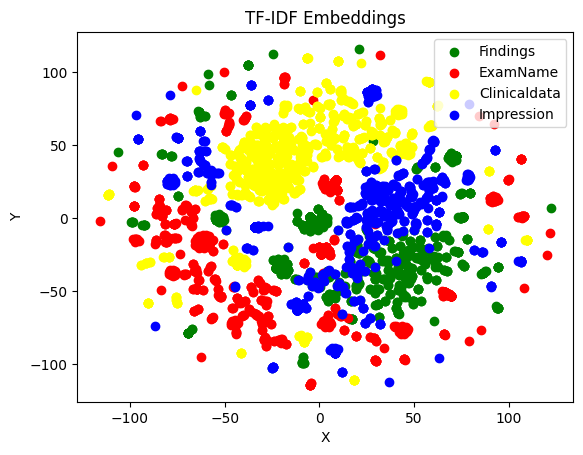

In [15]:
# Plot with different colors
plt.title("TF-IDF Embeddings")
plt.xlabel("X")
plt.ylabel("Y")

# Notation :,# takes all the columns from the number
lF = len(report_findings)
lC = len(report_clinicaldata)
lE = len(report_examname)
lI = len(report_impression)


plt.scatter(X_embedded[0:lF,0], X_embedded[0:lF,1], c='green')
plt.scatter(X_embedded[lF:lF+lC,0], X_embedded[lF:lF+lC,1], c='red')
plt.scatter(X_embedded[lF+lC:lF+lC+lE,0], X_embedded[lF+lC:lF+lC+lE,1], c='yellow')
plt.scatter(X_embedded[lF+lC+lE:,0], X_embedded[lF+lC+lE:,1], c='blue')
plt.legend(['Findings', 'ExamName','Clinicaldata','Impression'])

In [11]:
plt.show()

In [12]:
# Imports for supervised machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
# Examdata, clinical data, findings, impression combined for trainign
x = X
e = [0]*len(report_examname)
c = [1]*len(report_clinicaldata)
f= [2]*len(report_findings)
i=[3]*len(report_impression)
total = e+c+f+i
y = np.array(total)

In [17]:
# Apply train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50, stratify=y)

In [18]:
# Regression - fits the model and returns it with the intercept and slope
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

In [19]:
# Imports for the visuals
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [20]:
# model = LogisticRegression().fit(x_train, y_train)
# model.score(x_train, y_train)
# model.score(x_test, y_test)

# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
# model.score(x_train, y_train)
# model.score(x_test, y_test)

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
# model.score(x_train, y_train)
# model.score(x_test, y_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [22]:
# Everything is almost 1 or 1
lr=LogisticRegression(C=1, solver ='saga')
lr.fit(x_train, y_train)
lr_preds=lr.predict(x_test)

print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print("Accuracy Score: %.3f" % accuracy_score(y_test, lr_preds))

[[190   0   0   0]
 [  0 190   0   0]
 [  0   0 190   0]
 [  0   0   0 190]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       190
           3       1.00      1.00      1.00       190

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Accuracy Score: 1.000


c:\Users\elefe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[190,   0,   0,   0],
       [  0, 190,   0,   0],
       [  0,   0, 190,   0],
       [  0,   0,   0, 190]], dtype=int64)

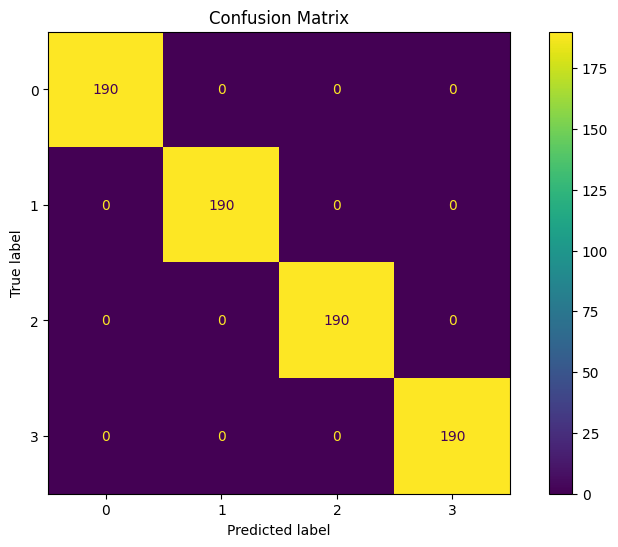

In [23]:
# Graph confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Confusion Matrix")
display = plot_confusion_matrix(model, x_test, y_test, ax=ax)
display.confusion_matrix
